<h2><center> Windows Store EDA

<H1>IMPORTING

In [ ]:
pwd

In [3]:
cd E:\Data Analysis Study\Project

E:\Data Analysis Study\Project


In [ ]:
!pip install opendatasets --upgrade -quit

In [ ]:
dataset_url = 'https://www.kaggle.com/vishnuvarthanrao/windows-store/code'

In [ ]:
import opendatasets as od
od.download(dataset_url)

In [ ]:
data_dir = './windows-store'

In [ ]:
import os 
os.listdir(data_dir)

<h1> CLEANING

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import seaborn as sns
sns.set_style('darkgrid')

In [142]:
df = pd.read_csv('windows-store\msft.csv')

In [186]:
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0.0
2,BookViewer,3.5,593,Books,29-02-2016,0.0
3,Brick Instructions,3.5,684,Books,30-01-2018,0.0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0.0
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,54.5
5317,JS King,1.0,720,Developer Tools,19-07-2018,269.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,64.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,269.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [165]:
df.isnull().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [164]:
df.describe()

,Rating,No of people Rated,Price
count,5321.000000,5321.000000,5321.000000
mean,3.792708,551.798722,11.012253
std,0.991681,259.787733,117.202914
min,1.000000,100.000000,0.000000
25%,3.500000,327.000000,0.000000
50%,4.000000,548.000000,0.000000
75%,4.500000,779.000000,0.000000
max,5.000000,1000.000000,5449.000000


Cleaning the Price column and converting it into Float

In [166]:
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0.0
2,BookViewer,3.5,593,Books,29-02-2016,0.0
3,Brick Instructions,3.5,684,Books,30-01-2018,0.0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0.0
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,54.5
5317,JS King,1.0,720,Developer Tools,19-07-2018,269.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,64.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,269.0


In [148]:
df.drop(index=5321,inplace=True)

In [150]:
df.Price = df.Price.str.replace('Free', '0.00')

In [152]:
df.Price=df.Price.str.replace('₹ ', '')

In [157]:
df.Price = df.Price.str.replace(',','')

In [161]:
df.Price.unique()

array([   0. ,  144. ,   54. ,   99. ,  219. ,  269. ,  134. ,  164. ,
        109. , 1624. , 1099. , 1349. ,   59. ,  154. ,  119. ,   94. ,
         69. ,  139. ,  189. ,  549. ,   79. , 2599. ,  299. ,  574. ,
        329.4, 1521.8,  324. ,  824. , 5449. ,   89.5,  114. ,  194. ,
        319. ,  624. , 2149. , 1149. ,  434. ,  279. ,  209. ,  699. ,
       1899. ,  489. ,   54.5,   64. ])

In [160]:
df.Price = df.Price.astype(float)

- most rated book
- most rated product
- most sold produce
- types of product
- most expensive product
- total no of free product


<h3>Most Rated Product?

In [167]:
MRP = df.groupby(['Category']).sum()['Rating'].reset_index()

In [168]:
MRP = MRP.sort_values('Rating', ascending = False)
MRP

,Category,Rating
9,Music,2831.0
0,Books,2680.5
1,Business,2446.0
5,Health and Fitness,1995.0
2,Developer Tools,1943.0
7,Lifestyle,1894.5
11,News and Weather,1853.5
6,Kids and Family,1362.0
12,Social,1262.0
3,Food and Dining,629.0


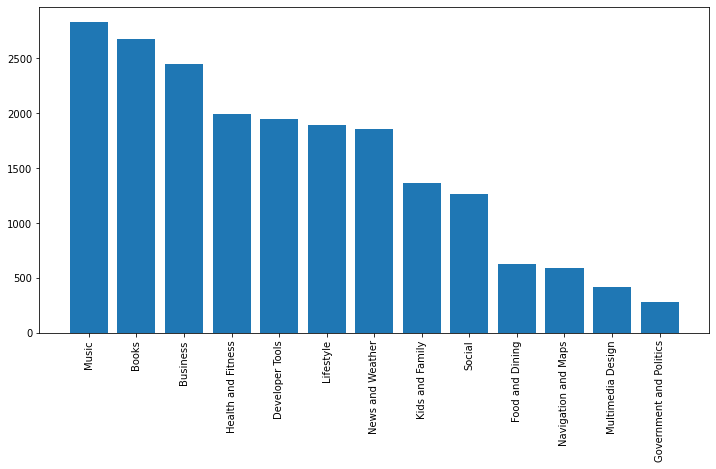

In [169]:
plt.figure(figsize=(12,6))
plt.bar(MRP.Category,MRP.Rating)
plt.xticks(rotation='vertical');

<h1>Understanding the data

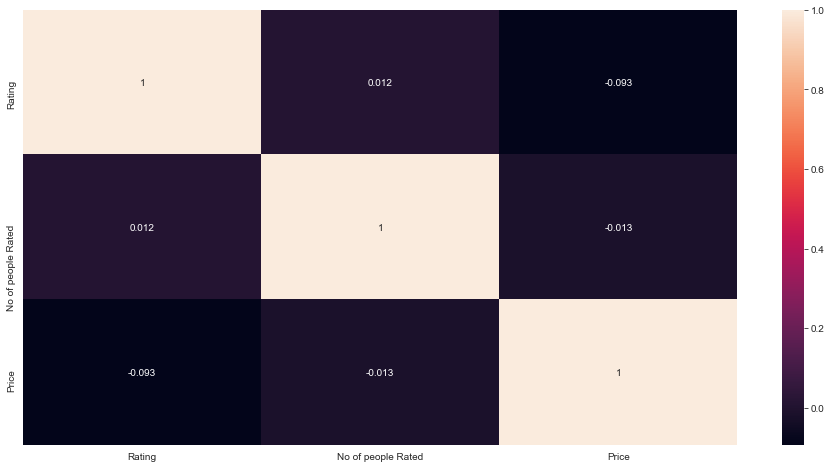

In [181]:
plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), annot=True);

<h3> The Most expensive product?

In [170]:
MEP = df.sort_values('Price', ascending = True).tail(10)
MEP

,Name,Rating,No of people Rated,Category,Date,Price
5299,Offline Documentation Browser,1.0,153,Developer Tools,13-03-2020,1149.0
5181,Oxford Dictionary of English,4.0,391,Books,22-07-2014,1349.0
5259,"Grapholite - Diagrams, Flow Charts and Floor P...",4.0,287,Business,22-02-2013,1521.8
5183,"Oxford Advanced Learner's Dictionary, 8th edition",4.0,403,Books,31-01-2013,1624.0
5175,Oxford Dictionary of English and Thesaurus,3.0,290,Books,23-01-2015,1624.0
5255,Office Suite - Powerful editor for Adobe pdf a...,4.0,352,Business,01-12-2017,1624.0
5310,EditPlus,4.0,778,Developer Tools,27-09-2016,1899.0
5295,RocketCake Professional,4.0,691,Developer Tools,08-12-2016,2149.0
5202,EasyReader,4.0,990,Books,10-07-2019,2599.0
5281,Pengwin Enterprise,3.0,368,Developer Tools,29-11-2018,5449.0


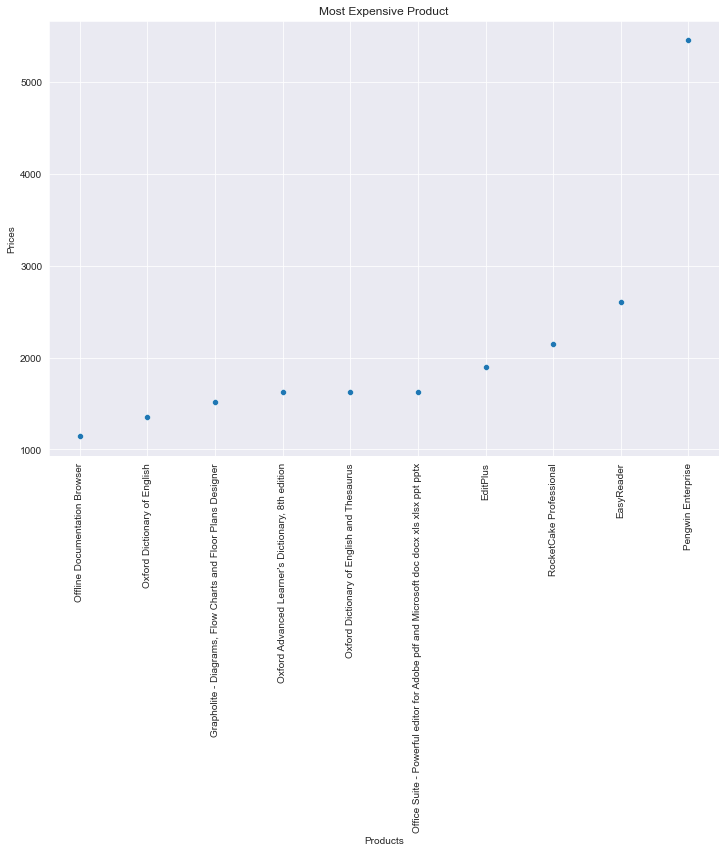

In [194]:
plt.figure(figsize=(12,8))
#plt.plot(MEP.Name,MEP.Price, 's-g');
sns.scatterplot(x = MEP.Name,y =MEP.Price);

plt.xticks(rotation='vertical');
plt.xlabel('Products')
plt.ylabel('Prices')
plt.title('Most Expensive Product');